In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

### Importing Data

In [2]:
data = pd.read_csv('F:/DA/dgs_metadata_filtered.csv')

### This Data has almost 25 features but we need only some particular 

In [3]:
data.head()

,id,name,address,square_feet,PSU,EUI,city,country,state,yearBuilt,...,referencePropertyTypeMedian,systemDefinedPropertyType,annual_electricity_use,annual_energy_cost,annual_ghg_emissions,annual_natural_gas_use,cost_per_square_foot,gas_percent_of_energy_cost,latitude,longitude
0,1,1st District Headquarters,101 M STREET SW,90635.0,Police Station,78.0,Washington,US,DC,2011.0,...,CBECS - Fire Station/Police Station,Police Station,1549348.79,"$198,497.95",1011.75,17683.92,$2.19,8.68%,38.88,-77.01
1,10,Shadd Elementary,5601 EAST CAPITOL STREET SE,72100.0,K-12 School,65.0,Washington,US,DC,1000.0,...,CBECS - Elementary/Middle & High School,K-12 School,534735.00,"$90,468.12",468.73,28649.00,$1.25,30.84%,NaN,NaN
2,100,Johnson Middle School,1400 BRUCE PLACE SE,182500.0,K-12 School,46.0,Washington,US,DC,1970.0,...,CBECS - Elementary/Middle & High School,K-12 School,1726578.97,"$227,054.24",1159.33,25713.04,$1.24,11.03%,NaN,NaN
3,101,Douglass Community Center,1898 STANTON TERRACE SE,4336.0,Social/Meeting Hall,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,39184.10,"$4,584.54",23.22,0.00,$1.06,NaN,38.85,-76.98
4,102,Group Home,1259 SUMNER ROAD SE,2000.0,Other - Lodging/Residential,86.0,NaN,NaN,NaN,NaN,...,NaN,NaN,22182.40,"$3,529.19",18.23,958.78,$1.76,26.46%,NaN,NaN


### What we are doing here is slicing required data from main dataframe to a new one. From the main data frame we extract the features such as: 
 Area as 'Sqr_Ft'
 Annual Energy use as 'Annual gas use'
 Cost incured per sq.ft as 'cost_per'
 Green house gas Emission of the building as 'Gas_emision'

In [4]:
new_data = pd.DataFrame({'Sqr_Ft' : data.loc[:,'square_feet'],
                        'Annual_use' : data.loc[:,'annual_electricity_use'],
                        'Annual gas use' : data.loc[:,'annual_natural_gas_use'], 
                        'cost_per' : data.loc[:,'cost_per_square_foot'], 
                        'Gas_emmision' : data.loc[:,'annual_ghg_emissions']})

### Striping of doller sign and converting it into float

In [5]:
for i in range(0,658):
    if not (pd.isnull(new_data.loc[i,'cost_per'])) :
        new_data.loc[i,'cost_per'] = float(new_data.loc[i,'cost_per'].strip('$'))
    i=i+1

Checking For Null values

In [6]:
new_data['Sqr_Ft'].isna().sum()

285

### Removing all empty or defective rows 

In [7]:
new_data = new_data.dropna(subset = ['Sqr_Ft'])
new_data.dropna(subset = ['Annual gas use'], inplace=True)

After cleaning the data now its time to get our features ready, so we are diving the existing columns with suitable ones to the following values respectively:

1)Percent of total energy from natural gas as 'gas_percent'

2)Emissions per square feet as 'EPF'

3)Energy used per square feet as 'Energy_PF'

4)Ammount of gas used as 'gas_used_PF'

In [8]:
new_data['gas_percent'] = new_data['Annual gas use']/new_data['Annual_use']
new_data['EPF'] = new_data['Gas_emmision']/new_data['Sqr_Ft']
new_data['Energy_PF'] = new_data['Annual_use']/new_data['Sqr_Ft']
new_data['gas_used_PF'] = new_data['Annual gas use']/new_data['Sqr_Ft']


### Checking and cleaning data for any defects such as infinity or NaN which may arrisie due to division

In [9]:
new_data.replace([np.inf,-np.inf], np.nan,inplace=True)
new_data.dropna(subset=['gas_percent','EPF','Energy_PF','gas_used_PF'],inplace=True)

### Assiging a Linear Regression model to reg1

In [10]:
reg1 = linear_model.LinearRegression(normalize=True)

In [11]:
new_data.shape

(365, 9)

### Reseting Index

In [12]:
new_data.reset_index(inplace=True)

### Spliting the data into 2 fragmets one as train data used for training the data set, another as a test data used for validating the model 

In [13]:
TrainD= new_data.loc[0:349,:]
TestD= new_data.loc[350:364,:]

### Normalizing the data so that no value dominates other features while regression

In [14]:
TR = pd.DataFrame({'gas_percent_N':(TrainD['gas_percent']/(TrainD['gas_percent'].median())),
                         'EPF': TrainD['EPF']/(TrainD['EPF'].median()),
                         'Energy_PF':TrainD['Energy_PF']/(TrainD['Energy_PF'].median()),
                         'gas_used_PF':TrainD['gas_used_PF']/(TrainD['gas_used_PF'].median()),
                          'Total_Energy':TrainD['Annual_use']/(TrainD['Annual_use'].median())})

In [15]:
TD = pd.DataFrame({'gas_percent_N':(TestD['gas_percent']/(TestD['gas_percent'].median())),
                         'EPF': TestD['EPF']/(TestD['EPF'].median()),
                         'Energy_PF':TestD['Energy_PF']/(TestD['Energy_PF'].median()),
                         'gas_used_PF':(TestD['gas_used_PF']/TestD['gas_used_PF'].median()),
                          'Total_Energy':TestD['Annual_use']/(TestD['Annual_use'].median())})

In [16]:
TD

,gas_percent_N,EPF,Energy_PF,gas_used_PF,Total_Energy
350,5.963017,0.054750,0.032620,0.200824,0.004015
351,1.219992,1.000000,1.141667,1.438008,0.343210
352,1.000000,1.732560,2.065587,2.132595,2.661405
353,0.249318,0.656461,0.921856,0.237291,2.409959
354,1.026275,1.147592,1.360988,1.442058,1.938393
355,0.000000,0.195999,0.292420,0.000000,0.031273
356,0.557984,0.329406,0.431054,0.248324,0.553635
357,1.563868,1.777553,1.903351,3.073150,0.341749
358,0.481259,1.576589,2.098652,1.042758,1.606658
359,0.000000,1.206114,1.800053,0.000000,2.560678


### The following step Checks for any outliers in the data and replace it with the median as the number of outliers is very small

In [17]:
k = []
k.clear()
for l in range(0,4):
    for j in range(0,TR['EPF'].size):
        if(TR.iloc[j,l]>6.6):
             k.append(j)
            
    for j in k:
        TR.iloc[j,l]=TR.iloc[:,l].median()
            
    k.clear()


In [18]:
k.clear()
k = []
for l in range(0,4):
    for j in range(0,TD['EPF'].size):
        if(TD.iloc[j,l]>6.6):
             k.append(j)
            
    for j in k:
        TD.iloc[j,l]=TD.iloc[:,l].median()
            
    k.clear()


In [19]:
TD.drop(index=364,inplace=True)

### Running the regression model with features as 'Energy_PF', 'gas_used_PF', 'Total_Energy'

In [20]:
reg1.fit(TR[['Energy_PF','gas_used_PF','Total_Energy']],TR.EPF)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### Coefficients of the model

In [21]:
reg1.coef_

array([ 8.61203625e-01,  1.01623860e-01, -8.34348964e-07])

### Using the Test data to predict the values with model and finding the accuracy of the model

In [22]:
res=reg1.predict(TD[['Energy_PF','gas_used_PF','Total_Energy']])

In [29]:
((res-TD['EPF'])/TD['EPF']).mean()*100

22.86610075671855

### In our case it comes out to be somewhere near 75% accurate

### From here we use the above model, trying to find out that how much increase in gas usage will cut the emmisions by 10%

In [30]:
TD['EPF_new'] = res

In [31]:
new_test = TD.copy()

In [32]:
new_test

,gas_percent_N,EPF,Energy_PF,gas_used_PF,Total_Energy,EPF_new
350,5.963017,0.054750,0.032620,0.200824,0.004015,0.073140
351,1.219992,1.000000,1.141667,1.438008,0.343210,1.153982
352,1.000000,1.732560,2.065587,2.132595,2.661405,2.020250
353,0.249318,0.656461,0.921856,0.237291,2.409959,0.842657
354,1.026275,1.147592,1.360988,1.442058,1.938393,1.343272
355,0.000000,0.195999,0.292420,0.000000,0.031273,0.276472
356,0.557984,0.329406,0.431054,0.248324,0.553635,0.421099
357,1.563868,1.777553,1.903351,3.073150,0.341749,1.976117
358,0.481259,1.576589,2.098652,1.042758,1.606658,1.937973
359,0.000000,1.206114,1.800053,0.000000,2.560678,1.574849


In [33]:
new_test['gas_used_PF']=(new_test['gas_used_PF']*1.80)

In [134]:
new_test

,gas_percent_N,EPF,Energy_PF,gas_used_PF,Total_Energy,EPF_new
350,5.963017,0.054750,0.032620,0.361484,0.004015,0.073140
351,1.219992,1.000000,1.141667,2.588415,0.343210,1.153982
352,1.000000,1.732560,2.065587,3.838670,2.661405,2.020250
353,0.249318,0.656461,0.921856,0.427124,2.409959,0.842657
354,1.026275,1.147592,1.360988,2.595704,1.938393,1.343272
355,0.000000,0.195999,0.292420,0.000000,0.031273,0.276472
356,0.557984,0.329406,0.431054,0.446982,0.553635,0.421099
357,1.563868,1.777553,1.903351,5.531670,0.341749,1.976117
358,0.481259,1.576589,2.098652,1.876964,1.606658,1.937973
359,0.000000,1.206114,1.800053,0.000000,2.560678,1.574849


In [35]:
res = reg1.predict(new_test[['Energy_PF','gas_used_PF','Total_Energy']])

In [36]:
(res/new_test['EPF_new']).mean()

1.0796557099993607

### Creating a linear graph as x-axis equals % increase in gas usage,

In [37]:
EPF = []
k=0
EPF.clear()
for i in range (0,100):
    new_test = TD.copy()
    new_test['gas_used_PF']=(new_test['gas_used_PF']*((1)+(i/100)))
    res = reg1.predict(new_test[['Energy_PF','gas_used_PF','Total_Energy']])
    k=k+1
    EPF.append(abs(res/(new_test['EPF_new'])).mean())

               
k
    

100

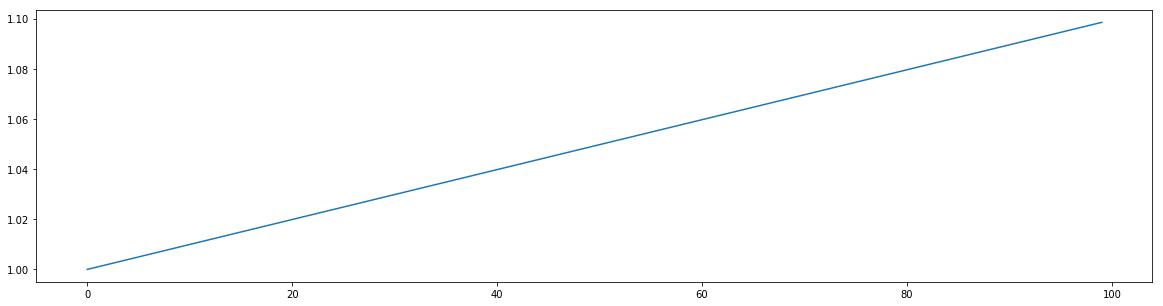

In [38]:
x=list(range(100))
#y1=TD['EPF_new']
y2=EPF
plt.figure(figsize=(20,5))
#plt.plot(x,y1)
plt.plot(x,y2)
#plt.plot(x,)

In [39]:
EPF[80]

1.0796557099993607

### From the above we could see that an 100% increase in gas use would only lead to decrese in 10% of GHG emissions, If we consider the below

In [40]:
(new_data['Annual gas use']/new_data['Annual_use']).mean()*100

3.8430068466260834

### On an average only 3.8% of total energy used by buildings is provided by natural gas, to so its a very significant decrease in Green house gas emission but just doubling the usage of gas.

In [41]:
pwd

'C:\\Users\\AADITHIYA'